# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
from collections import deque
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from dqn_agent import Agent

In [2]:
# define environment which is BANANA collector.
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 1. Banana environment brief description
There is 1 agent to train.

The number of actions are 4. (which are move forward/backwoard turn right/left.)

The state space has 37 dimensions and contains the agent's velocity, alogn with ray-based perception of objects around the agent's forward direction.

In [4]:
# reset the environment (train_mode is True) (To train the agent on my environment.)
env_info = env.reset(train_mode=True)[brain_name]

# name of brain
print('The name of brain: ', brain_name)

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)


The name of brain:  BananaBrain
Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [5]:

# Define agent
agent = Agent(state_size = state_size, action_size = action_size, seed=40)

QNetwork initialize done
QNetwork initialize done
initialize done


### Take random actions on the given environment
I stored the scores for every episodes and its mean values.
The learning will be done when the agents gets 15 reward as avgs.
And every 100*n th episodes, I will recode average score, too.

In [6]:
# From the lecture
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    score_changes_to_plot = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]        
        score = 0 # initialize score
        for t in range(max_t):
            action = agent.act(state, eps)
            # note that the return value of env.step is different with dqn solution of udacity.
            env_info = env.step(action)[brain_name] # brain info includes next_state, reward, and done info

            next_state = env_info.vector_observations
            reward = env_info.rewards[0]
            done = env_info.local_done[0]

            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        score_changes_to_plot.append(np.mean(scores_window))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print("{}th episode is passed:", i_episode)
            print('Average Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            # the target score is +13. but I aimed more high scores 15.
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_final.pth')
            break
    return scores, score_changes_to_plot



In [7]:
# Let's start learning!
# dqn() means the settings are ready with default value.
scores, score_changes_to_plot = dqn()

Episode 100	Average Score: 1.13{}th episode is passed: 100
Average Score: 100.00
Episode 200	Average Score: 4.87{}th episode is passed: 200
Average Score: 200.00
Episode 300	Average Score: 7.38{}th episode is passed: 300
Average Score: 300.00
Episode 400	Average Score: 10.02{}th episode is passed: 400
Average Score: 400.00
Episode 500	Average Score: 12.35{}th episode is passed: 500
Average Score: 500.00
Episode 600	Average Score: 13.60{}th episode is passed: 600
Average Score: 600.00
Episode 700	Average Score: 14.20{}th episode is passed: 700
Average Score: 700.00
Episode 800	Average Score: 14.77{}th episode is passed: 800
Average Score: 800.00
Episode 900	Average Score: 14.75{}th episode is passed: 900
Average Score: 900.00
Episode 1000	Average Score: 14.23{}th episode is passed: 1000
Average Score: 1000.00
Episode 1050	Average Score: 15.05
Environment solved in 950 episodes!	Average Score: 15.05


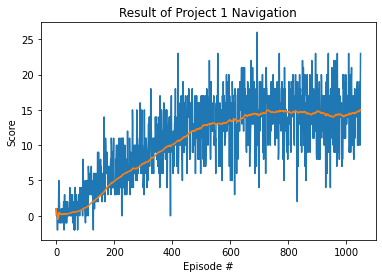

In [8]:

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Result of Project 1 Navigation")
plt.plot(np.arange(len(scores)), scores, label = "dqn agent")
plt.plot(np.arange(len(scores)), score_changes_to_plot, label = "average of scores")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
env.close()